## DATA & Library LOAD

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


In [2]:
data_x = pd.read_csv("train_x_2.csv")
data_y = pd.read_csv("train_y_2.csv")

test_x = pd.read_csv("test_x_2.csv")
del test_x['ID']
del data_x['ID']
del data_y['ID']

## Data proprecessing

+ (1) 범주형 변수는 ONE-HOT-ENCODING (‘runnynose’, ‘bodypain’,’diffbreath)
+ (2) 연속형 변수는 범주형으로 그룹화 (np.digitze())
+ 온도 36.5 37.5 38.5
+ 나이 10 ~ 80 (앞자리로 구분)
+ 대체적으로 전처리 전후에 큰 차이가 없고, 모든 변수와 코로나 여부가 굉장히 낮은 
+ 상관관계를 갖고 있음 


## 범주형 데이터

In [3]:
data = data_x

In [4]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['bodypain']=label_encoder.fit_transform(data['bodypain'])
data['runnynose']=label_encoder.fit_transform(data['runnynose'])
data['diffbreath']=label_encoder.fit_transform(data['diffbreath'])

In [5]:
a=pd.get_dummies(data['bodypain'], prefix='bodypain')
b=pd.get_dummies(data['runnynose'], prefix='runnynose')
c= pd.get_dummies(data['diffbreath'], prefix='diffbreath')
dum = pd.concat([a,b,c],axis =1)

In [6]:
del data['bodypain']
del data['runnynose']
del data['diffbreath']

In [7]:
data = pd.concat([data,dum],axis = 1)
data_x = data

## 수치형 데이터 

In [8]:
data_x['fever'] = (5*(data_x['fever']-32))/9
bins = [36.5,37.5,38]
data_x['fever'] = np.digitize(data_x['fever'], bins)

data_x

,fever,age,bodypain_0,bodypain_1,runnynose_0,runnynose_1,diffbreath_0,diffbreath_1,diffbreath_2
0,1,26,1,0,0,1,1,0,0
1,1,61,0,1,0,1,0,1,0
2,2,13,0,1,1,0,1,0,0
3,3,55,0,1,0,1,0,1,0
4,2,37,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,1,27,0,1,0,1,1,0,0
1496,1,61,0,1,0,1,1,0,0
1497,3,71,0,1,1,0,0,0,1
1498,2,21,1,0,1,0,1,0,0


In [9]:
bins = [10,20,30,40,50,60,70,80,90]
data['age'] = np.digitize(data_x['age'], bins)


In [10]:
a=pd.get_dummies(data_x['fever'], prefix='fever')
b=pd.get_dummies(data_x['age'], prefix='age')
dum = pd.concat([a,b],axis =1)
dum

,fever_1,fever_2,fever_3,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8
0,1,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0
2,0,1,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,0
4,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,1,0,0,0,1,0,0,0,0,0,0
1496,1,0,0,0,0,0,0,0,1,0,0
1497,0,0,1,0,0,0,0,0,0,1,0
1498,0,1,0,0,1,0,0,0,0,0,0


In [11]:
data_x = pd.concat([data_x,dum],axis =1)
del data_x['age']
del data_x['fever']
data_x

,bodypain_0,bodypain_1,runnynose_0,runnynose_1,diffbreath_0,diffbreath_1,diffbreath_2,fever_1,fever_2,fever_3,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8
0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
3,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0
1496,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0
1497,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1498,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0


# minmax sclaer
scaler = MinMaxScaler()
scaler.fit(data_x)
data_x = scaler.transform(data_x)

## Train-Valid Data SPLIT

In [12]:
train_x,valid_x,train_y,valid_y = train_test_split(data_x,data_y,test_size = 0.2,random_state=20)

train_x, valid_x = data_x[:1000], data_x[1000:]
train_y, valid_y = data_y[:1000], data_y[1000:]

In [13]:
train_x

,bodypain_0,bodypain_1,runnynose_0,runnynose_1,diffbreath_0,diffbreath_1,diffbreath_2,fever_1,fever_2,fever_3,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8
1211,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
71,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
679,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0
379,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0
316,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1247,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0
271,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
474,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0


## 0. Random prediction

+ made random prediction in order to compare with the model
+ since it's binary classification problem, about 0.5 is anticipated

In [14]:
random_ans = np.random.randint(0,2,(len(data_x)))

In [15]:
f1_score(random_ans,data_y)

0.5159538357094365

## 1. DecisionTreeClassifier

+ when max_depth is too high, overfitting increases
+ 

#### train, valid LOSS (depth 에따라) 그래프 그리고 적합한 depth 찾기

In [16]:
model_dt = DecisionTreeClassifier(max_depth = 4,random_state=1).fit(train_x,train_y)
print(model_dt.score(train_x,train_y))

0.575


In [17]:
pred_dt = model_dt.predict(valid_x)
f1_score(pred_dt,valid_y)

0.5342019543973942

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
scores=cross_val_score(model_dt, data_x, data_y, cv=10)

In [19]:
np.mean(scores)

0.5053333333333334

In [20]:
dt = []
for i in range(1,20):
    rand =[]
    for j in range(1,40):
        model_dt = DecisionTreeClassifier(max_depth = i,random_state=j)
        scores=cross_val_score(model_dt, data_x, data_y, cv=5)
        tem = np.mean(scores)
        rand.append(tem)
    ans = np.mean(rand)
    dt.append(ans)
dt

[0.5093333333333335,
 0.5286666666666665,
 0.5199999999999998,
 0.5173333333333333,
 0.5266666666666667,
 0.5279999999999997,
 0.5313333333333333,
 0.5245470085470086,
 0.5243247863247865,
 0.5249572649572652,
 0.509846153846154,
 0.5042051282051282,
 0.4998803418803418,
 0.5001025641025642,
 0.5001025641025642,
 0.5001025641025642,
 0.5001025641025642,
 0.5001025641025642,
 0.5001025641025642]

No handles with labels found to put in legend.


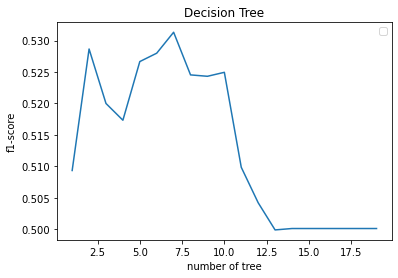

In [21]:

from matplotlib import pyplot as plt
x = np.arange(1,20)
plt.title("Decision Tree")
plt.plot(x,dt)
plt.xlabel("number of tree")
plt.ylabel("f1-score")
plt.legend()
plt.show()

## 2. KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn_classifier = KNeighborsClassifier(n_neighbors =13)
knn_classifier.fit(train_x, train_y)
knn_pred = knn_classifier.predict(valid_x)

<ipython-input-23-6a97ea575db3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_classifier.fit(train_x, train_y)


In [24]:
f1_score(knn_pred,valid_y)

0.518032786885246

In [25]:
one_hot= pd.read_csv("all_onehot.csv")

In [26]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
data_x = minMaxScaler.fit_transform(data_x)

In [27]:
dt = []
for i in range(1,50):
    rand =[]
    for j in range(1,2):
        model_dt =  KNeighborsClassifier(n_neighbors =i)
        scores=cross_val_score(model_dt, data_x, data_y, cv=10)
        tem = np.mean(scores)
        rand.append(tem)
    ans = np.mean(rand)
    dt.append(ans)
dt

C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pas

C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pas

C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pas

C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pas

C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pas

C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pas

C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pas

C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pas

C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pas

C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pas

C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pas

C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pas

C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pas

C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pas

C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pas

C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pas

[0.5026666666666667,
 0.49799999999999994,
 0.518,
 0.5013333333333334,
 0.5113333333333333,
 0.5106666666666667,
 0.5119999999999999,
 0.5006666666666666,
 0.5013333333333334,
 0.48599999999999993,
 0.49399999999999994,
 0.4959999999999999,
 0.5126666666666667,
 0.5106666666666667,
 0.5153333333333332,
 0.49866666666666665,
 0.4866666666666667,
 0.502,
 0.49800000000000005,
 0.5073333333333333,
 0.49333333333333335,
 0.5119999999999999,
 0.4946666666666667,
 0.49799999999999994,
 0.48933333333333334,
 0.49066666666666664,
 0.49733333333333335,
 0.49933333333333324,
 0.504,
 0.504,
 0.5079999999999999,
 0.5,
 0.506,
 0.506,
 0.49533333333333324,
 0.506,
 0.49333333333333335,
 0.5113333333333333,
 0.5120000000000001,
 0.5106666666666666,
 0.512,
 0.5073333333333332,
 0.5073333333333332,
 0.508,
 0.5126666666666667,
 0.5,
 0.5006666666666667,
 0.4993333333333333,
 0.4993333333333334]

No handles with labels found to put in legend.


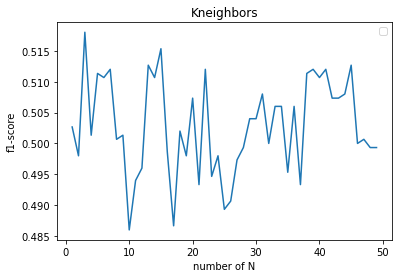

In [28]:
from matplotlib import pyplot as plt
x = np.arange(1,50)
plt.title("Kneighbors")
plt.plot(x,dt)
plt.xlabel("number of N")
plt.ylabel("f1-score")
plt.legend()
plt.show()

## 3. LogisticRegression

In [29]:
# 아무것도 전처리 안한게 성능이 좋음...

In [30]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data_x['bodypain']=label_encoder.fit_transform(data_x['bodypain'])
data_x['runnynose']=label_encoder.fit_transform(data_x['runnynose'])
data_x['diffbreath']=label_encoder.fit_transform(data_x['diffbreath'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
data_x = minMaxScaler.fit_transform(data_x)

In [ ]:
data_x

In [ ]:
dt = []
model_dt =  LogisticRegression()
scores=cross_val_score(model_dt, data_x, data_y, cv=10)
tem = np.mean(scores)
dt.append(tem)
dt

In [283]:
data_x.to_csv("all_onehot.csv",index =False)

## 결과 내기

In [395]:
data_x = pd.read_csv("train_x_2.csv")
data_y = pd.read_csv("train_y_2.csv")

test_x = pd.read_csv("test_x_2.csv")
del test_x['ID']
del data_x['ID']
del data_y['ID']

# DT

In [396]:
model_dt = DecisionTreeClassifier(max_depth = 4,random_state=1).fit(data_x,data_y)
ans = model_dt.predict(test_x)
ans = pd.DataFrame(ans)

In [397]:
ans.to_csv("dt.csv",index = False)

# KNN
+ MIN-MAX 해준걸로 하기..

In [398]:
data_x = pd.read_csv("train_x_2.csv")
data_y = pd.read_csv("train_y_2.csv")

test_x = pd.read_csv("test_x_2.csv")
del test_x['ID']
del data_x['ID']
del data_y['ID']

In [399]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
data_x = minMaxScaler.fit_transform(data_x)
test_x =  minMaxScaler.transform(test_x)

In [400]:
model_dt =  KNeighborsClassifier(n_neighbors =13)
model_dt.fit(data_x,data_y)

<ipython-input-400-a4a5ce20433f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_dt.fit(data_x,data_y)


KNeighborsClassifier(n_neighbors=13)

In [401]:
ans = model_dt.predict(test_x)
ans = pd.DataFrame(ans)

In [402]:
ans.to_csv("knn.csv",index = False)

# 로지스틱 회귀

In [403]:
data_x = pd.read_csv("train_x_2.csv")
data_y = pd.read_csv("train_y_2.csv")

test_x = pd.read_csv("test_x_2.csv")
del test_x['ID']
del data_x['ID']
del data_y['ID']

In [404]:
model_dt =  LogisticRegression()
model_dt.fit(data_x,data_y)

C:\Users\SIL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [405]:
ans = model_dt.predict(test_x)
ans = pd.DataFrame(ans)

In [406]:
ans.to_csv("log.csv",index = False)

In [407]:
data_x.describe()

,fever,bodypain,age,runnynose,diffbreath
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,100.522167,0.484000,47.505333,0.486667,-0.043333
std,1.443977,0.499911,20.544992,0.499989,0.820917
min,98.005787,0.000000,12.000000,0.000000,-1.000000
25%,99.248617,0.000000,30.000000,0.000000,-1.000000
50%,100.561053,0.000000,48.000000,0.000000,0.000000
75%,101.752465,1.000000,65.000000,1.000000,1.000000
max,102.995724,1.000000,82.000000,1.000000,1.000000


In [408]:
test_x.describe()

,fever,bodypain,age,runnynose,diffbreath
count,499.000000,499.000000,499.000000,499.000000,499.000000
mean,100.481547,0.501002,46.809619,0.537074,0.034068
std,1.422460,0.500501,20.244039,0.499124,0.799624
min,98.006414,0.000000,12.000000,0.000000,-1.000000
25%,99.275258,0.000000,30.000000,0.000000,-1.000000
50%,100.378971,1.000000,46.000000,1.000000,0.000000
75%,101.694003,1.000000,64.000000,1.000000,1.000000
max,102.989024,1.000000,82.000000,1.000000,1.000000


# 최종

In [409]:
dt = pd.read_csv("dt.csv")
knn = pd.read_csv("knn.csv")
lr = pd.read_csv("log.csv")

In [410]:
ass2 = pd.concat([dt,knn,lr],axis = 1)

In [411]:
ass2.to_csv("ass2(2021311558).csv",index =False)

In [415]:
ass2.head(-10)

,0,0,0
0,0,0,0
1,0,0,0
2,1,0,1
3,0,1,0
4,1,1,1
...,...,...,...
484,0,1,0
485,0,0,0
486,0,1,0
487,0,1,0
